0.0
0.25
0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25
2.5
2.75
3.0
3.25
3.5
3.75
4.0
4.25
4.5
4.75
5.0
5.25
5.5
5.75
6.0
6.25
6.5
6.75
7.0
7.25
7.5
7.75
8.0
8.25
8.5
8.75
9.0
9.25
9.5
9.75
10.0
10.25
10.5
10.75
11.0
11.25
11.5
11.75
12.0
12.25
12.5
12.75
13.0
13.25
13.5
13.75
14.0
14.25
14.5
14.75
15.0
15.25
15.5
15.75
16.0
16.25
16.5
16.75
17.0
17.25
17.5
17.75
18.0
18.25
18.5
18.75
19.0
19.25
19.5
19.75
20.0
20.25
20.5
20.75
21.0
21.25
21.5
21.75
22.0
22.25
22.5
22.75
23.0
23.25
23.5
23.75
24.0
24.25
24.5
24.75
25.0
25.25
25.5
25.75
26.0
26.25
26.5
26.75
27.0
27.25
27.5
27.75
28.0
28.25
28.5
28.75
29.0
29.25
29.5
29.75
30.0
30.25
30.5
30.75
31.0
31.25
31.5
31.75
32.0
32.25
32.5
32.75
33.0
33.25
33.5
33.75
34.0
34.25
34.5
34.75
35.0
35.25
35.5
35.75
36.0
36.25
36.5
36.75
37.0
37.25
37.5
37.75
38.0
38.25
38.5
38.75
39.0
39.25
39.5
39.75
40.0
40.25
40.5
40.75
41.0
41.25
41.5
41.75
42.0
42.25
42.5
42.75
43.0
43.25
43.5
43.75
44.0
44.25
44.5
44.75
45.0
45.25
45.5
45.75
46.0
46.25
46.5
46.75
47.0
4

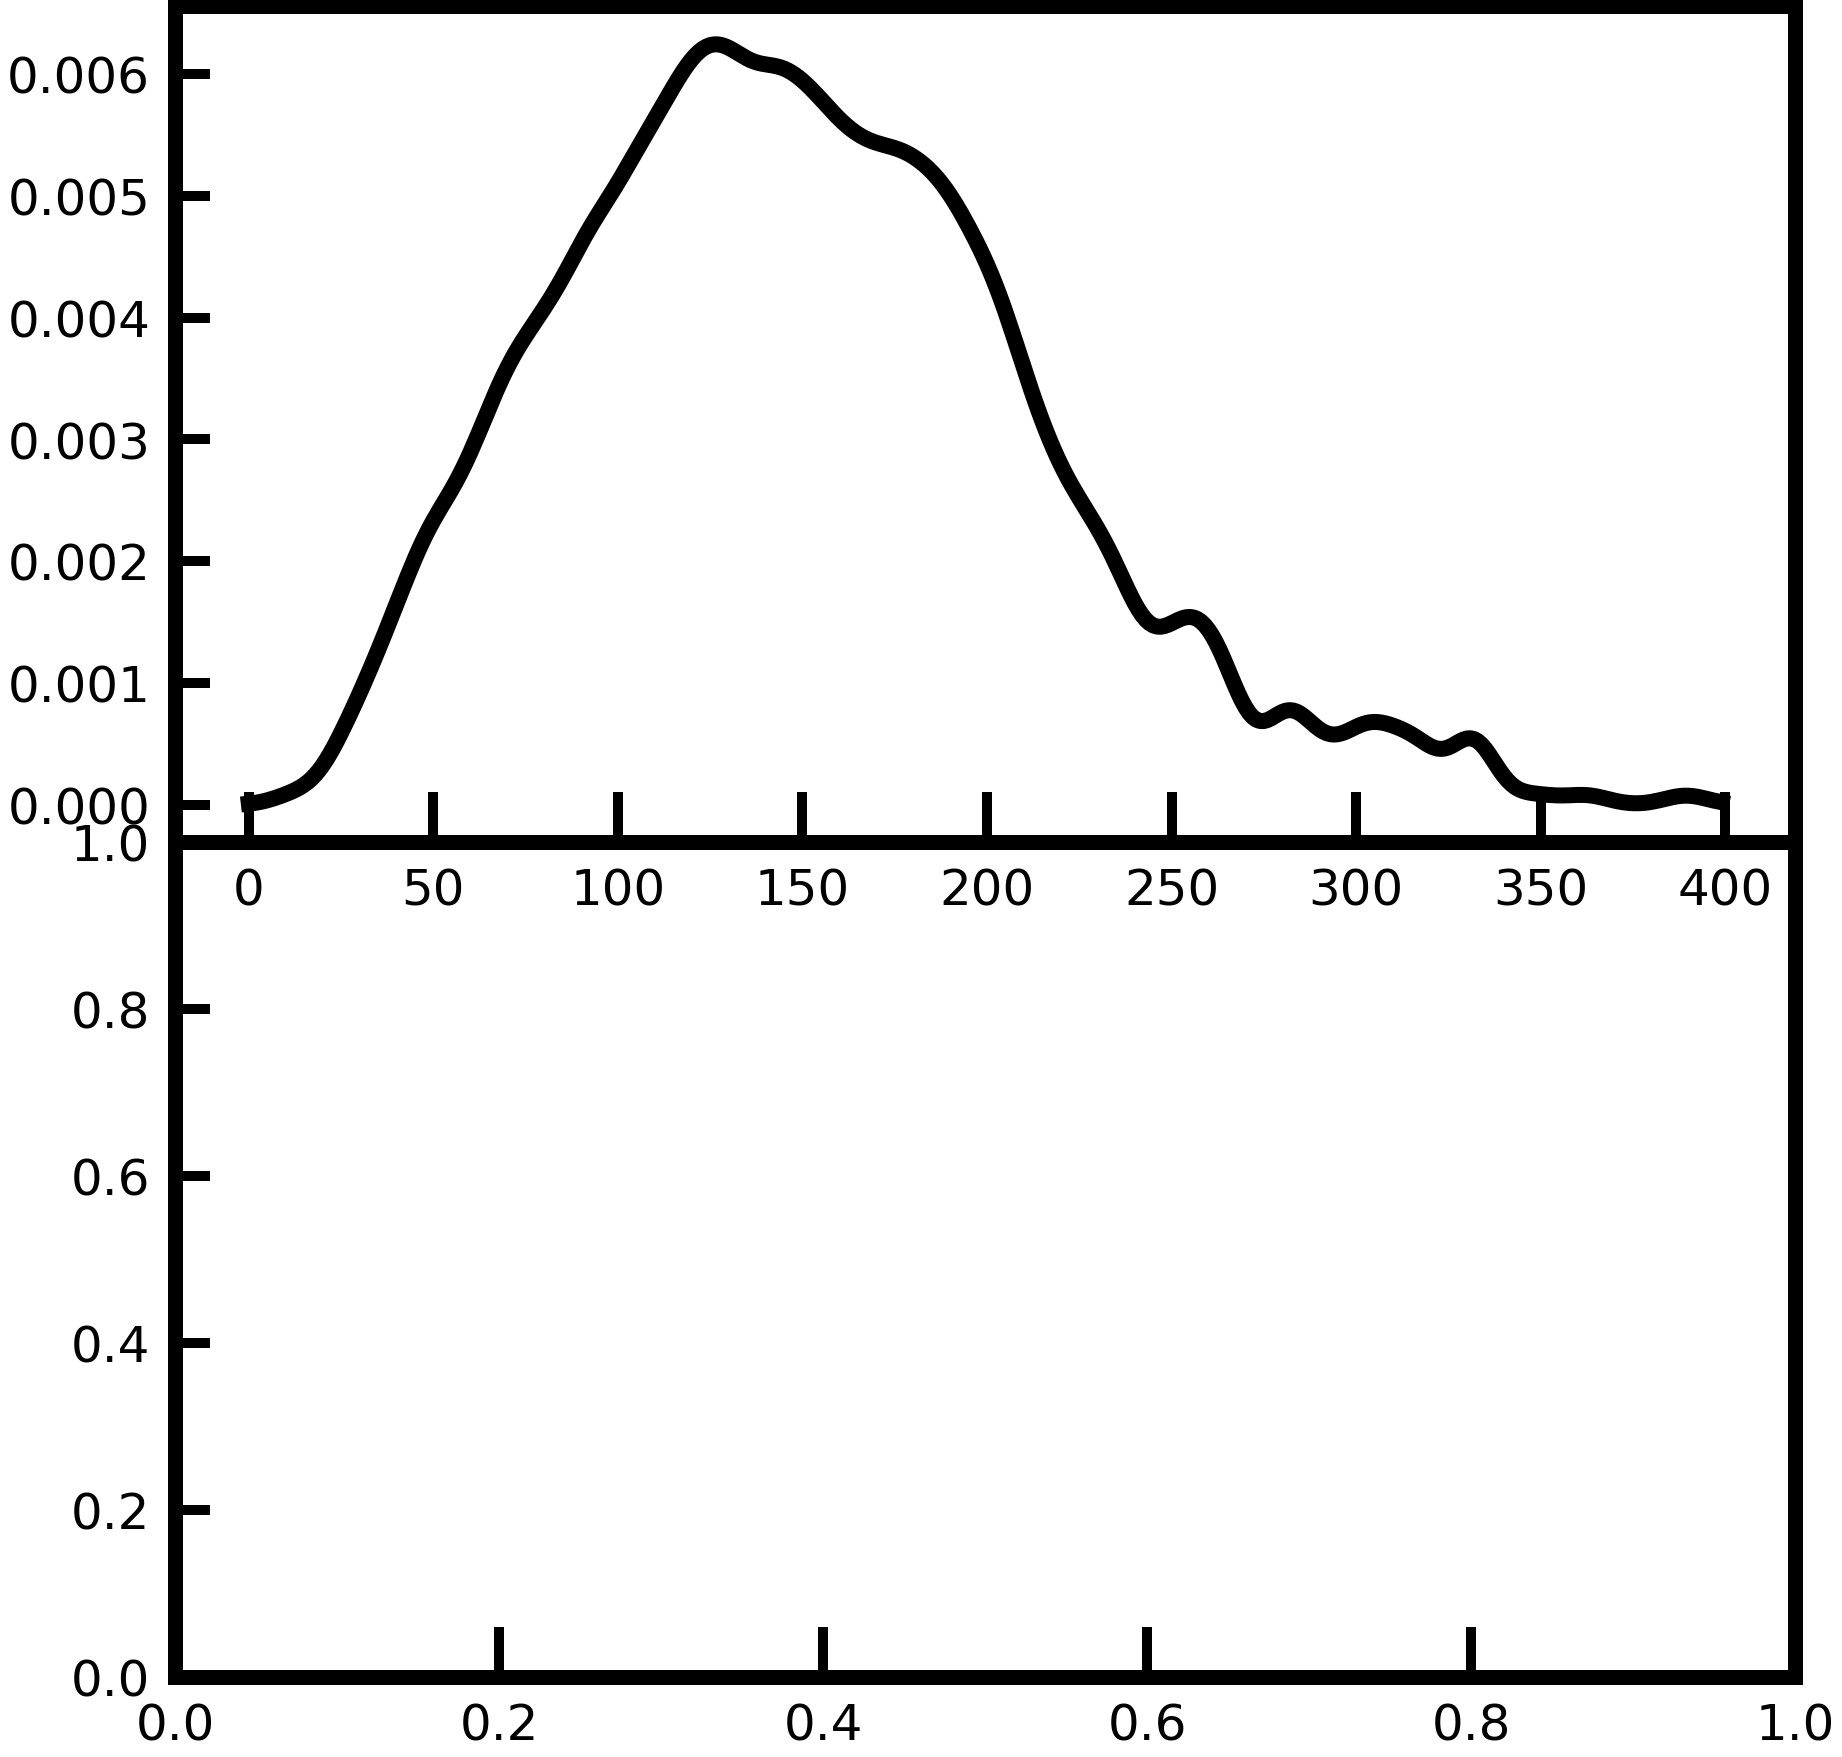

In [10]:
#Take the OUTCAR from the Phonon calculation and  grep "THz" OUTCAR > freq
#cut -c 48-58 freq > cm_1.dat This saves the energy in cm^{-1}
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['font.size'] = 75
plt.rcParams['axes.labelsize'] = 75
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.titlesize'] = 75
plt.rcParams['axes.titleweight']='normal'
plt.rcParams['xtick.labelsize'] =50
plt.rcParams['ytick.labelsize'] =50
plt.rcParams['lines.linewidth']=16.0
plt.rcParams['figure.figsize'] = 30,40
plt.rcParams['lines.markersize']=15
plt.rcParams['axes.linewidth'] =15

plt.rcParams['xtick.major.size']=50
plt.rcParams['xtick.direction']= 'in'
plt.rcParams['xtick.major.width']=10.0

plt.rcParams['ytick.major.size']=35
plt.rcParams['ytick.direction']= 'in'
plt.rcParams['ytick.major.width']=10.0

plt.rcParams['xtick.major.pad']='25'
plt.rcParams['ytick.major.pad']='25'


left,bottom,width,height = 0.1,0.1,0.75,0.29

#Define the no of boxes and their sizes
rect_two = [left,bottom,width,height]                   
rect_three= [left,bottom+height,width,height]            
two_plot = plt.axes(rect_two)
three_plot = plt.axes(rect_three)

sigma = 6.00               #~1.5% of the maximum energy (in cm^{-1})
inp1 = np.loadtxt("cm_1.dat",float)
inp2 = np.loadtxt("dxdydz.dat",float)
N,bin_size,N_modes = 300,1.0,897
out1 = open("g_w.dat",'w')
f = 0.0
freq=[]                     #declare list to hold values to be plotted
VDOS=[]
while f < 400:             #A little higher than the max energy (in cm^{-1})
    G_OMEGA = 0
    for j in range(len(modes)):
        num = (f - modes[j])**2
        den = 2 * sigma**2
        prefactor = 1/(np.sqrt(2*np.pi)*sigma)
        G_OMEGA += prefactor*np.exp(-(num/den))         #calculating the Gaussian
    freq.append(f)
    VDOS.append(G_OMEGA/(3*N))
    print("%5.3f"%(f),'\t',"%10.5f"%(G_OMEGA/(3*N)),file=out1)
    f += bin_size
out1.close()
three_plot.plot(freq,VDOS,color='k',label="total")      #Plot the total DoS

#Partial VDOS
#Make an array to keep dx**2 + dy**2 + dz**2 
ei_sq = np.zeros(len(inp2))
for a in range(len(inp2)):
    ei_sq[a] = inp2[a][0]**2 + inp2[a][1]**2 + inp2[a][2]**2
out2 = open("g_w_Zr.dat",'w')
out3 = open("g_w_Al.dat",'w')
out4 = open("g_w_Cu.dat",'w')

f,a1,a2,a3=0.0,0.0,0.0,0.0
while f < 400:                  #    Calculating over the required frequency domain
    p = 0
    while p < N:
        if p < 138:              #    N_atoms of Zr
            for q in range(N_modes):  #Summing over all the normal modes
                a1 += ei_sq[p+q*N]*np.exp(-(f-inp1[q])**2/(2*sigma**2))
            p += 1
        if p >= 138 and p < 162:
            for q in range(N_modes): # Summing over all the normal modes
                a2 += ei_sq[p+q*N]*np.exp(-(f-inp1[q])**2/(2*sigma**2))
            p += 1
        if p >= 162 and p < N:
            for q in range(N_modes):  #Summing over all the normal modes
                a3 += ei_sq[p+q*N]*np.exp(-(f-inp1[q])**2/(2*sigma**2))
            p += 1
    print("%5.3f"%(f),'\t',"%10.5f"%(a1/((3*N)*(np.sqrt(2*np.pi)*sigma))),file=out2)
    print("%5.3f"%(f),'\t',"%10.5f"%(a2/((3*N)*(np.sqrt(2*np.pi)*sigma))),file=out3)
    print("%5.3f"%(f),'\t',"%10.5f"%(a3/((3*N)*(np.sqrt(2*np.pi)*sigma))),file=out4)
    f += bin_size                       # Frequency bin size
    a1,a2,a3 = 0.0,0.0,0.0
out2.close()
out3.close()
out4.close()



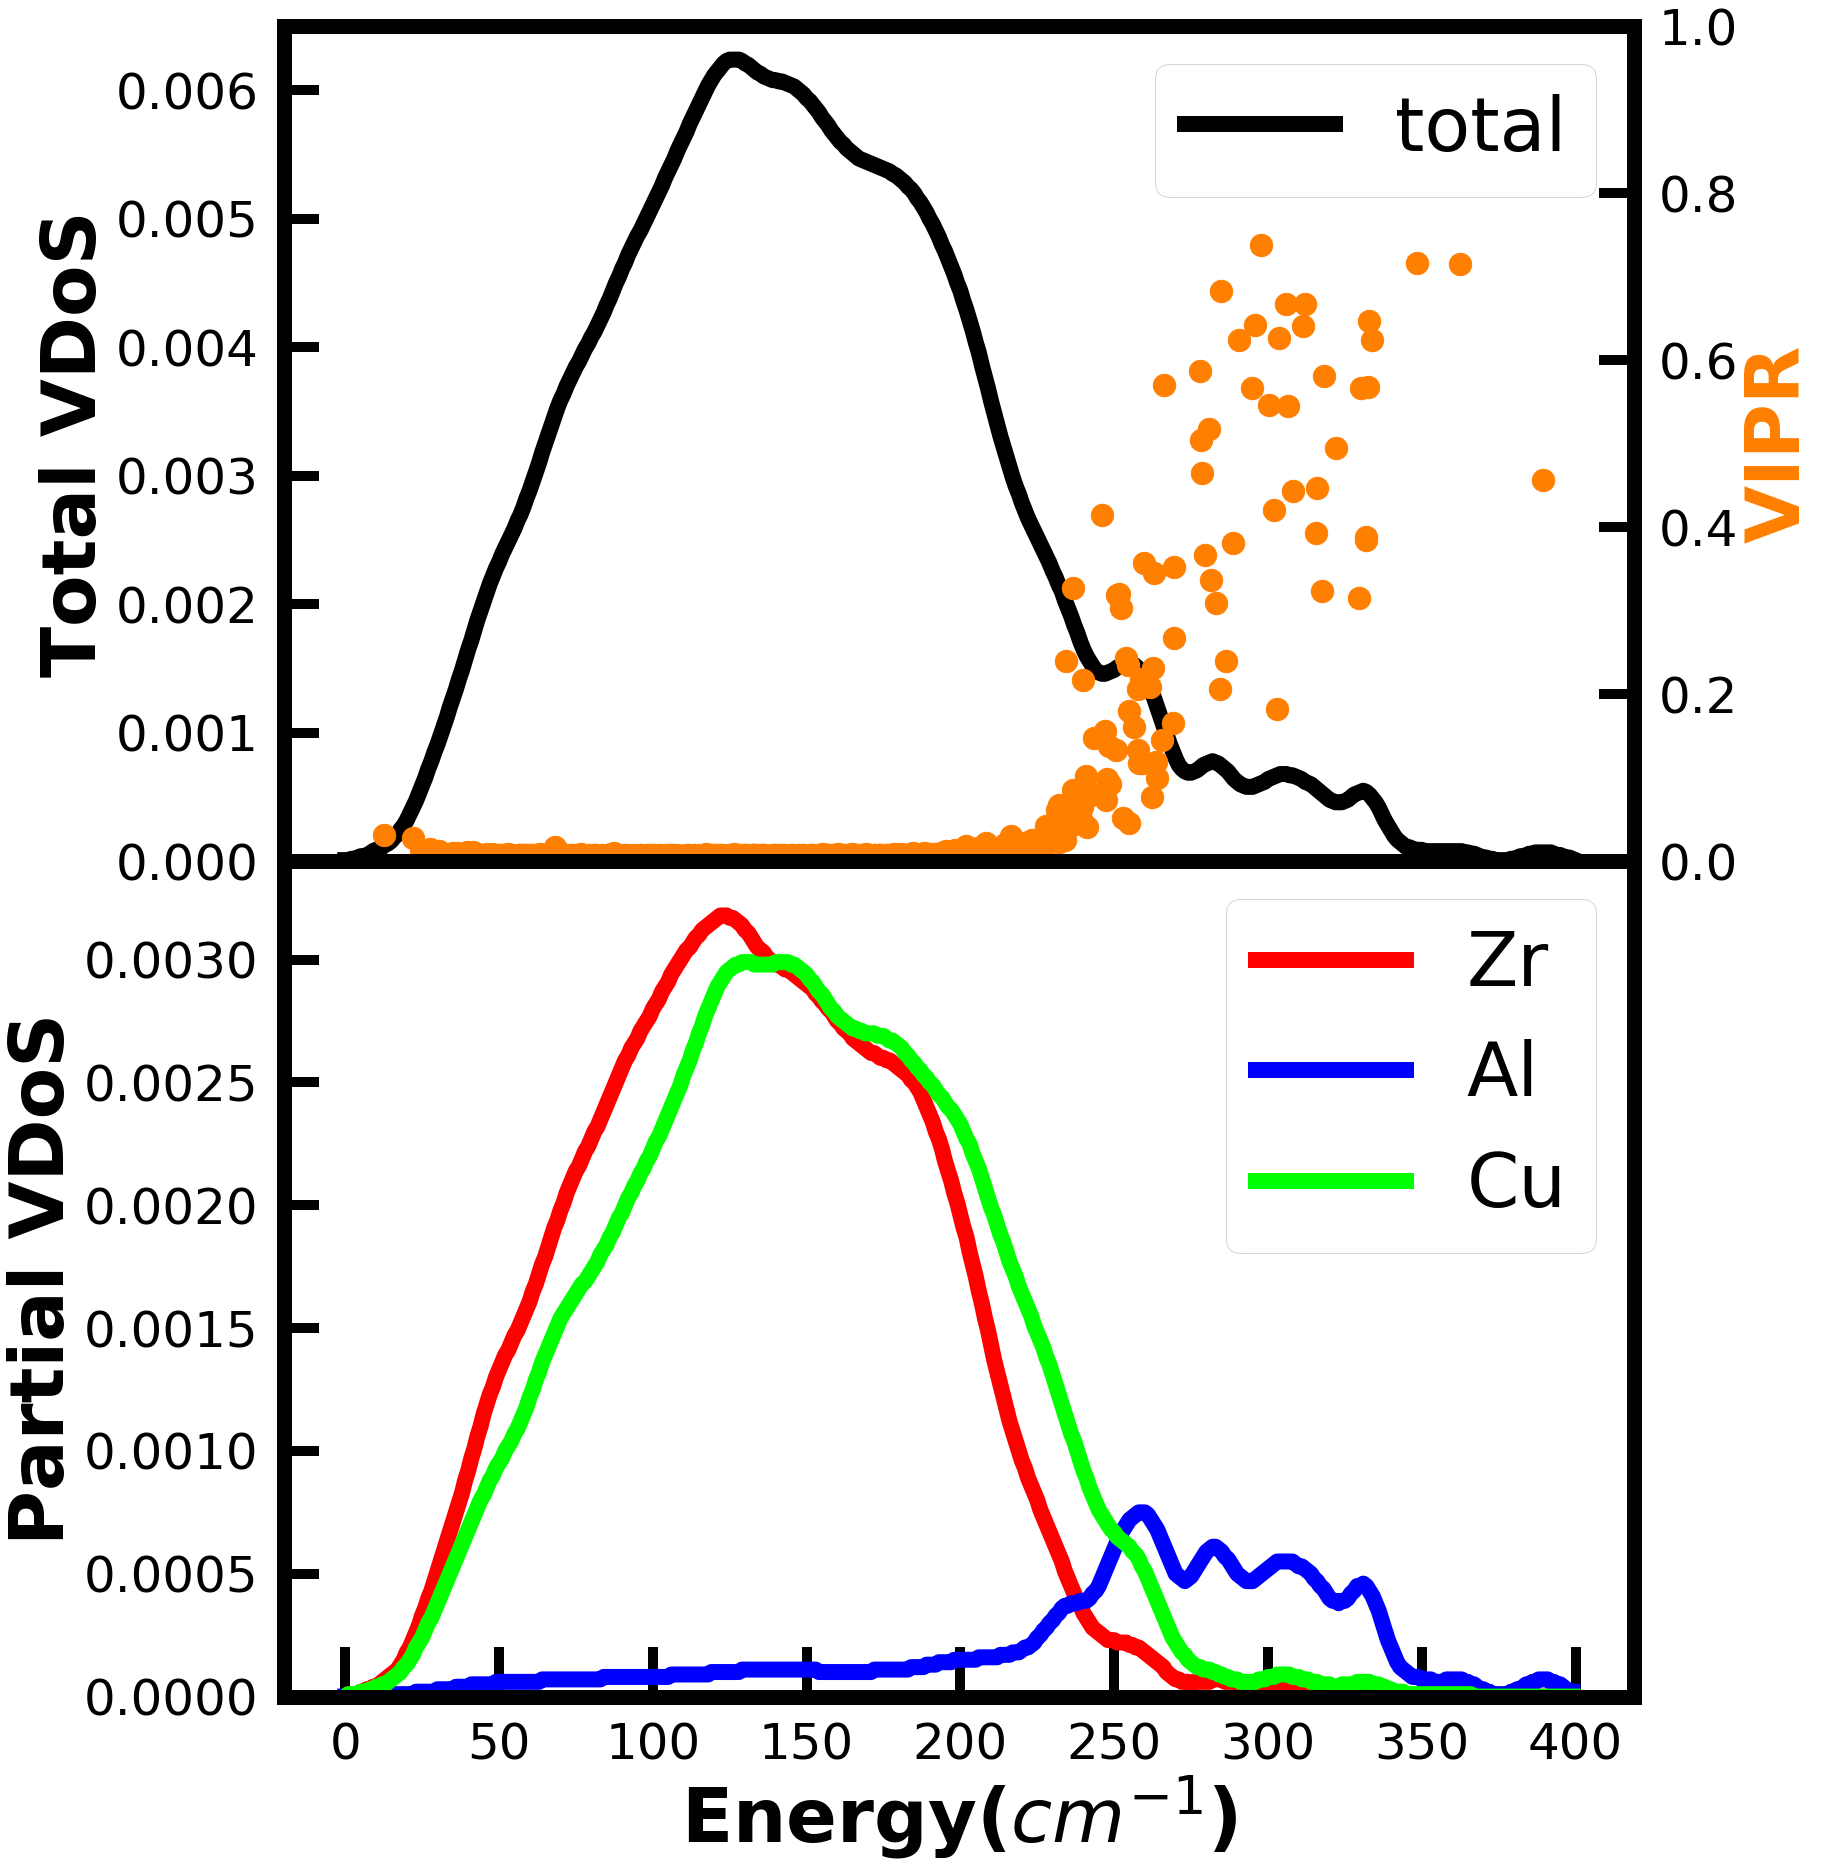

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 75
plt.rcParams['axes.labelsize'] = 75
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.titlesize'] = 75
plt.rcParams['axes.titleweight']='normal'
plt.rcParams['xtick.labelsize'] =50
plt.rcParams['ytick.labelsize'] =50
plt.rcParams['lines.linewidth']=16.0
plt.rcParams['figure.figsize'] = 25,40
plt.rcParams['lines.markersize']=15
plt.rcParams['axes.linewidth'] =15

plt.rcParams['xtick.major.size']=50
plt.rcParams['xtick.direction']= 'in'
plt.rcParams['xtick.major.width']=10.0

plt.rcParams['ytick.major.size']=35
plt.rcParams['ytick.direction']= 'in'
plt.rcParams['ytick.major.width']=10.0

plt.rcParams['xtick.major.pad']='25'
plt.rcParams['ytick.major.pad']='25'

NBANDS,NATOMS=897,300

rect_two = [left,bottom,width,height]                   
rect_three= [left,bottom+height,width,height]            
two_plot = plt.axes(rect_two)
three_plot = plt.axes(rect_three)

DoS= np.loadtxt("g_w.dat",float)
DoS_Zr = np.loadtxt("g_w_Zr.dat",float)
DoS_Al = np.loadtxt("g_w_Al.dat",float)
DoS_Cu = np.loadtxt("g_w_Cu.dat",float)

psi = np.loadtxt("dxdydz.dat")
en = np.loadtxt("cm_1.dat")

store = np.zeros([NBANDS,NATOMS],float)
ipr = np.zeros ([NBANDS],float)
band_no = 0     #indicates the band number you are working on
while band_no < NBANDS:
    N = band_no*NATOMS #This makes sure that the 2nd band starts from the 211th element, 3rd from 441 and so on
    atoms = 0
    num = 0
    den = 0 
    while atoms < NATOMS:
        store[band_no][atoms] = psi[N+atoms,0]**2+psi[N+atoms,1]**2+psi[N+atoms,2]**2
        num += (store[band_no][atoms])**2
        den += (store[band_no][atoms])
        atoms += 1
    ipr[band_no] = num/den**2  
    band_no += 1

three_plot.plot(DoS[:,0],DoS[:,1],color='k',label="total")      #Plot the total DoS
three_plot.set_ylabel("Total VDoS",fontweight='bold')
three_plot.tick_params(direction='in')
three_plot.legend(loc='upper right')
three_plot.set_xticks([])   
three_plot.set_xticklabels([])                                              #Hide xticklabels
three_plot.set_ylim(0,0.0065)
plt_32 = three_plot.twinx()                                                 #CREATE A SECOND set AXES THAT SHARES X-AXIS WITH three_plot
plt_32.scatter(en,ipr,s=500.0,color='#ff7f00')
plt_32.set_ylabel("VIPR", color='#ff7f00',fontweight='bold')
plt_32.set_ylim(0,1.0)
three_plot.set_xticklabels([])                                              #Hide xticklabels
plt_32.tick_params(direction='in')


two_plot.plot(DoS_Zr[:,0],DoS_Zr[:,1],color=(1.0,0.0,0.0),label="Zr")
two_plot.plot(DoS_Al[:,0],DoS_Al[:,1],color=(0.0,0.0,1.0),label="Al")
two_plot.plot(DoS_Cu[:,0],DoS_Cu[:,1],color=(0.0,1.0,0.0),label="Cu")
two_plot.set_ylabel("Partial VDoS",fontweight='bold')
two_plot.set_xlabel("Energy($cm^{-1}$)",fontweight='bold')
two_plot.set_ylim(0,0.0034)
two_plot.legend()

plt.savefig('VDOS_VIPR_FEAR_II.pdf',bbox_inches='tight',dpi=1200)

plt.show()